# Life cycle of machine learning project
###  data analysis
- Understand the project statement
- Data Collection
- Data check to perform 
- Exploraroty data analysis

### model development
- Understand the project statement
- Data Collection
- Data Cleaning
- feature engineering
- Data preprocessing
- Model training
- Choose the best model
### model deployment
- structure the code in modular programming
- configure the docker image to make the code deployable
- deploy the model in aws

libreries necesaries

In [124]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib

### 1.0 problem statement

University X aims to analyze potential grades for students based on their characteristics. Using historical data on students, including fields such as StudentID, Age, Gender, Ethnicity, Parental Education, Weekly Study Time, Absences, Tutoring, Parental Support, Extracurricular Activities, Sports, Music, Volunteering, GPA, and GradeClass, they intend to create a program that can automatically predict GradeClass based on these student attributes. For this purpose, they have hired you to develop the predictive model.

dataset url: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

###  2.0 Data Extraction

#### 2.1 Data extraccion from database 

In [111]:
driver = "ODBC+Driver+17+for+SQL+Server"
server_name = "localhost"
database = "BDdatasets"
UID = "sa"
PWD = "0440"

connection_string = f"mssql+pyodbc://{UID}:{PWD}@{server_name}/{database}?driver={driver}"

engine = create_engine(connection_string)

query = "SELECT * FROM StudentPerformance"

df = pd.read_sql_query( query ,engine )

#### 2.2 show top 5 records

In [112]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Female,Caucasian,Some College,19.833723,7,True,Moderate,False,False,True,False,2.929196,C
1,1002,18,Male,Caucasian,High School,15.408756,0,False,Low,False,False,False,False,3.042915,B
2,1003,15,Male,Asian,Bachelor's,4.210570,26,False,Moderate,False,False,False,False,0.112602,F
3,1004,17,Female,Caucasian,Bachelor's,10.028830,14,False,High,True,False,False,False,2.054218,D
4,1005,17,Female,Caucasian,Some College,4.672495,17,True,High,False,False,False,False,1.288061,F


#### 2.4 shape of dataset

In [113]:
df.shape

(2392, 15)

### 2.5 dataset information

# Student Information

**Student ID:**  
- `StudentID`: A unique identifier assigned to each student (ranging from 1001 to 3392).

# Demographic Details

- **Age**: Age of the students, ranging from 15 to 18 years.
- **Gender**: Gender of the students, where `0` represents Male and `1` represents Female.
- **Ethnicity**: The ethnicity of the students, coded as follows:
  - `0`: Caucasian
  - `1`: African American
  - `2`: Asian
  - `3`: Other

- **Parental Education**: Level of education achieved by parents, coded as follows:
  - `0`: None
  - `1`: High School
  - `2`: Some College
  - `3`: Bachelor's
  - `4`: Higher

# Study Habits

- **StudyTimeWeekly**: Weekly study time in hours, ranging from `0` to `20`.
- **Absences**: Number of absences during the school year, ranging from `0` to `30`.
- **Tutoring**: Status indicating if the student attends tutoring, where `0` indicates No and `1` indicates Yes.

# Parental Involvement

- **Parental Support**: Level of parental support, coded as follows:
  - `0`: None
  - `1`: Low
  - `2`: Moderate
  - `3`: High
  - `4`: Very High

# Extracurricular Activities

- **Extracurricular**: Participation in extracurricular activities, where `0` indicates No and `1` indicates Yes.
- **Sports**: Participation in sports, where `0` indicates No and `1` indicates Yes.
- **Music**: Participation in music-related activities, where `0` indicates No and `1` indicates Yes.
- **Volunteering**: Participation in volunteering activities, where `0` indicates No and `1` indicates Yes.

# Academic Performance

- **GPA**: Grade Point Average on a scale from `2.0` to `4.0`, influenced by study habits, parental involvement, and extracurricular activities.

# Target Variable: Grade Class

**GradeClass**: Classification of students' grades based on GPA:
  - `0`: 'A' (GPA >= 3.5)
  - `1`: 'B' (3.0 <= GPA < 3.5)
  - `2`: 'C' (2.5 <= GPA < 3.0)
  - `3`: 'D' (2.0 <= GPA < 2.5)
  - `4`: 'F' (GPA < 2.0)


### 3.0 data check

- check missing values
- drop nulls if is necesary
- check duplicates
- drop ids
- check data types
- check the number of unique values for each column
- check statistics in the dataset
- check what columns are numerical and which are categorical
- check the diferents categories present in each categorical columns

#### 3.1 check missing values

In [114]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

##### insights:
- there is not null values

#### 3.2 drop nulls if is necesary

In [115]:
### is not necesary

#### 3.3 check duplicates 

In [116]:
df.duplicated().sum()

0

##### insight:
- there is not duplicated values

#### 3.4 drops ids

In [117]:
#the gpa column is droped because gradeclass and gpa can be consideres labels, so is necesary delete one in this case
df = df.drop(columns = ["StudentID" , "GPA"])

#### 3.5 check data types

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   object 
 2   Ethnicity          2392 non-null   object 
 3   ParentalEducation  2392 non-null   object 
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   bool   
 7   ParentalSupport    2392 non-null   object 
 8   Extracurricular    2392 non-null   bool   
 9   Sports             2392 non-null   bool   
 10  Music              2392 non-null   bool   
 11  Volunteering       2392 non-null   bool   
 12  GradeClass         2392 non-null   object 
dtypes: bool(5), float64(1), int64(2), object(5)
memory usage: 161.3+ KB


#### 3.6 check unique values for each column

In [119]:
df.nunique()

Age                     4
Gender                  2
Ethnicity               4
ParentalEducation       5
StudyTimeWeekly      2392
Absences               30
Tutoring                2
ParentalSupport         5
Extracurricular         2
Sports                  2
Music                   2
Volunteering            2
GradeClass              5
dtype: int64

#### inghts
- there is only four types of age

#### 3.7 check statistic in the dataset

In [120]:
#in not posible make corr because the most of the column are categorical

#### 3.8 check whats columns are numerical and which are categoricla

In [121]:
categorical_columns =  [ column for column in df.columns if df[column].dtype =="bool" or df[column].dtype == "object"]
numerical_columns = [column for column in df.columns if df[column].dtype =="int64" or df[column].dtype =="float64" ]

print(f"categorical columns")
print(f"{categorical_columns}")
print()
print(f"numerical column")
print(f"{numerical_columns}")

categorical columns
['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']

numerical column
['Age', 'StudyTimeWeekly', 'Absences']


In [122]:
len(numerical_columns + categorical_columns )

13

#### 3.9 check the differents categories in the dataset

In [109]:
for column in categorical_columns:
    values = df[column].unique()
    print(f"column :  {column}")
    print(f"values : {values}")
    print()

column :  Gender
values : ['Female' 'Male']

column :  Ethnicity
values : ['Caucasian' 'Asian' 'African American' 'Other']

column :  ParentalEducation
values : ['Some College' 'High School' "Bachelor's" 'Higher' 'None']

column :  Tutoring
values : [ True False]

column :  ParentalSupport
values : ['Moderate' 'Low' 'High' 'Very High' 'None']

column :  Extracurricular
values : [False  True]

column :  Sports
values : [False  True]

column :  Music
values : [ True False]

column :  Volunteering
values : [False  True]

column :  GradeClass
values : ['C' 'B' 'F' 'D' 'A']



##### insight:
- gender , Ethnicity are ordinal columns
- column :  Tutoring ,  ParentalSupport,  Extracurricular , Music ,   Volunteering are nominal column

### 4.0 Exploring the dataset

- bar char and pie char
- hist plot
- box plot

In [137]:
palete = plt.cm.Set2.colors

#### 4.1 bar char and pie char

In [152]:
def plot_pie_and_bar_chart(column):
    values = df[column].value_counts()
    categories = df[column].value_counts().index
    colors = palete[: len(categories)]
    fig , axes = plt.subplots(1,2, figsize = ( 16, 6))
    fig.suptitle(column)
    
    axes[0].pie(values , labels = categories , autopct = "%1.2f%%", colors = colors)
    axes[0].legend(categories , loc ="upper right")
    axes[1].bar(categories , values , color = colors)
    plt.show()


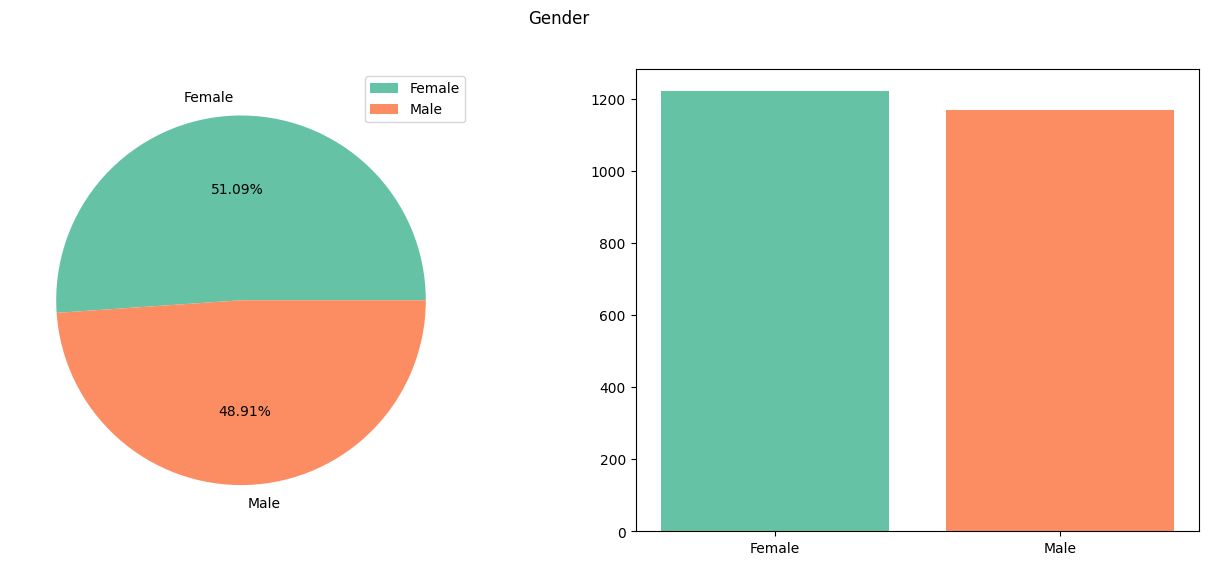

In [153]:
plot_pie_and_bar_chart("Gender")

### insight 
- gender is almost equally distributed

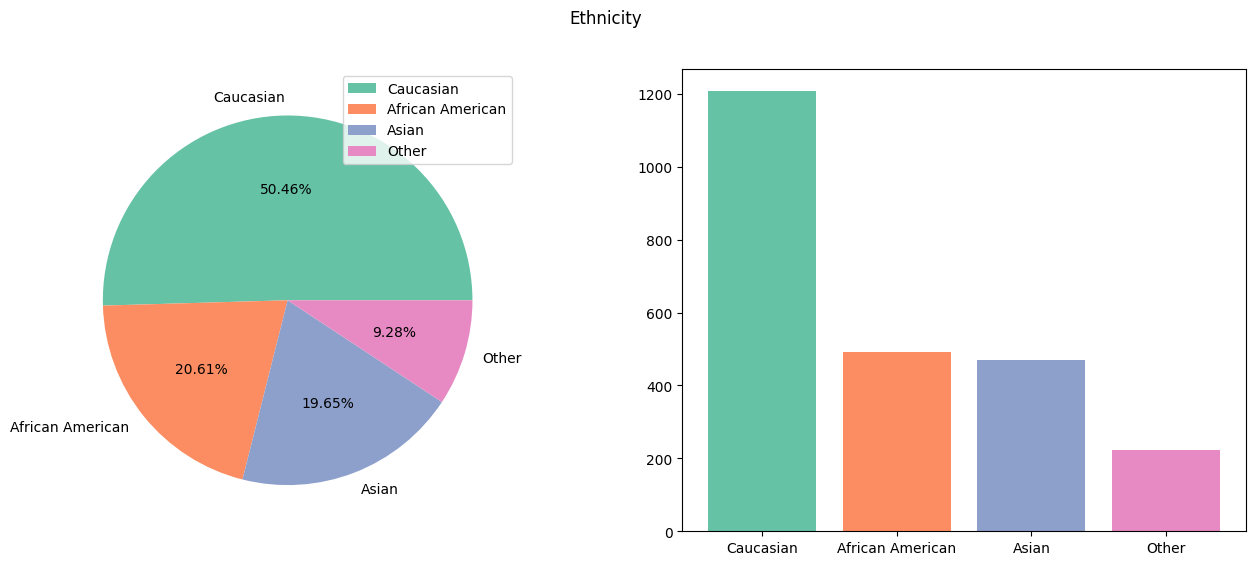

In [154]:
plot_pie_and_bar_chart("Ethnicity")

##### insight
- 50% of Ethnicity is  Caucasian	

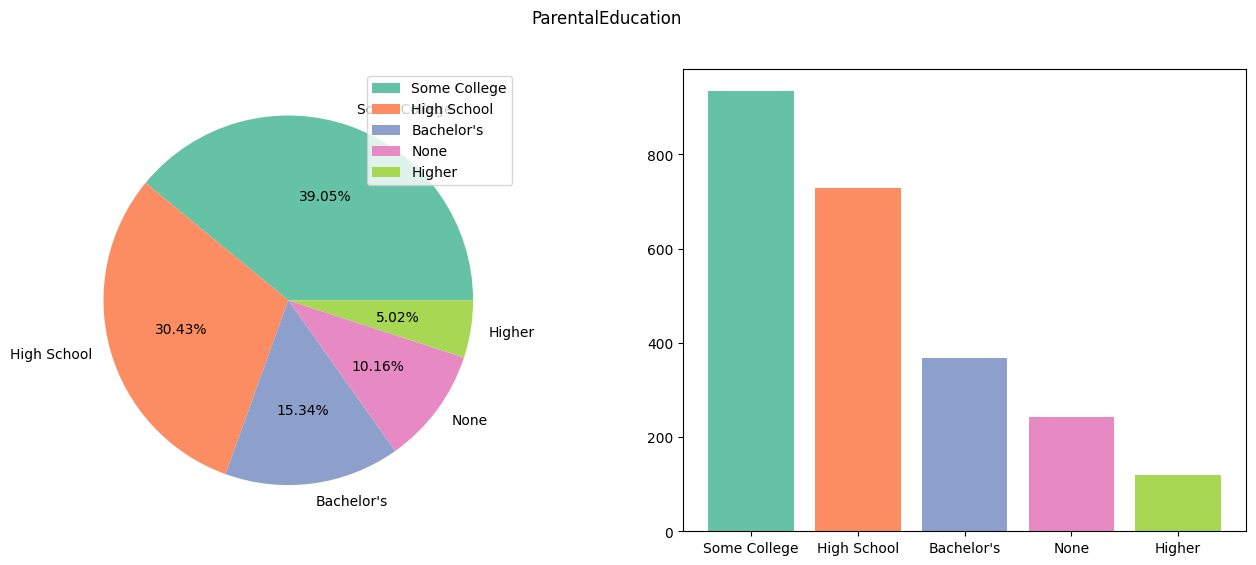

In [155]:
plot_pie_and_bar_chart("ParentalEducation")

##### insight
- the most of the parents of the students have a college or a high shool education

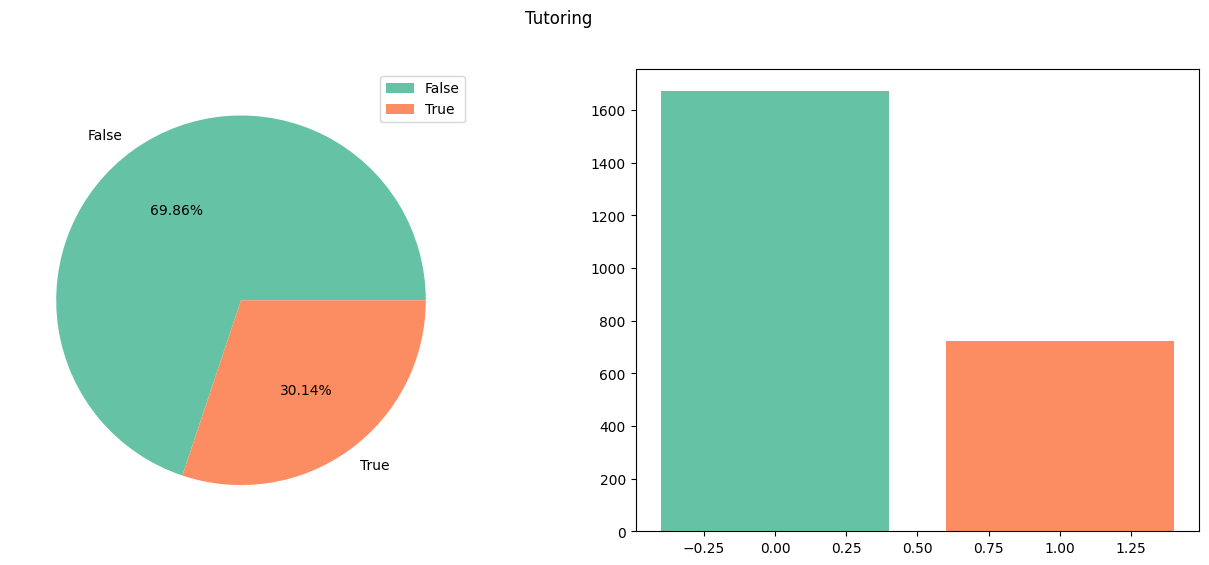

In [157]:
plot_pie_and_bar_chart("Tutoring")

##### insights
- the most of the students have not a tutor

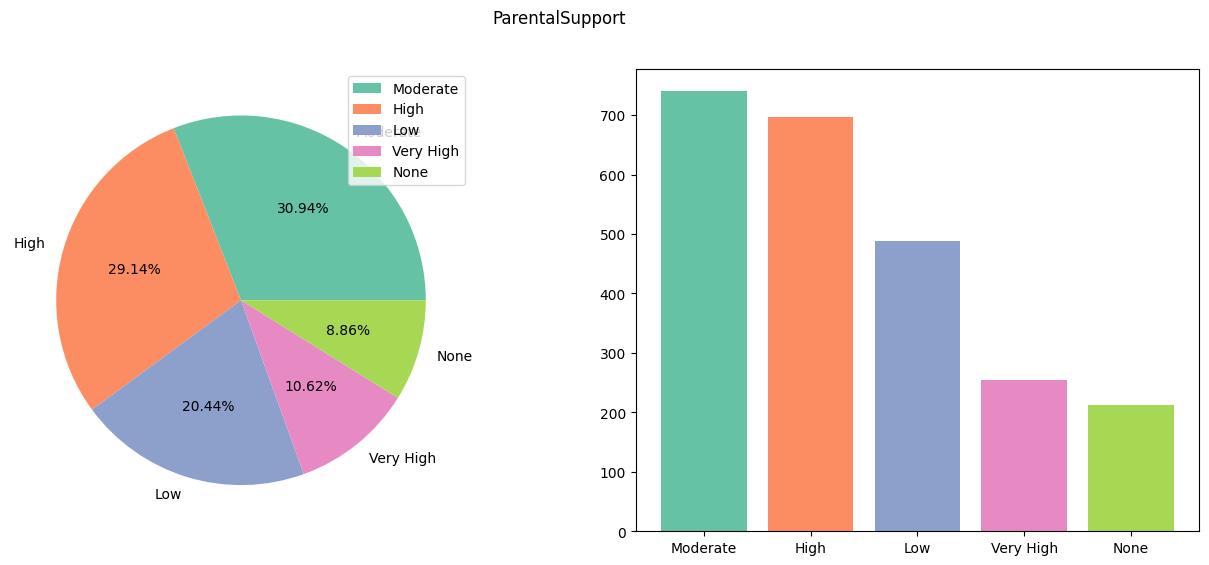

In [158]:
plot_pie_and_bar_chart("ParentalSupport")

##### insights
- the most of the student have some parental support

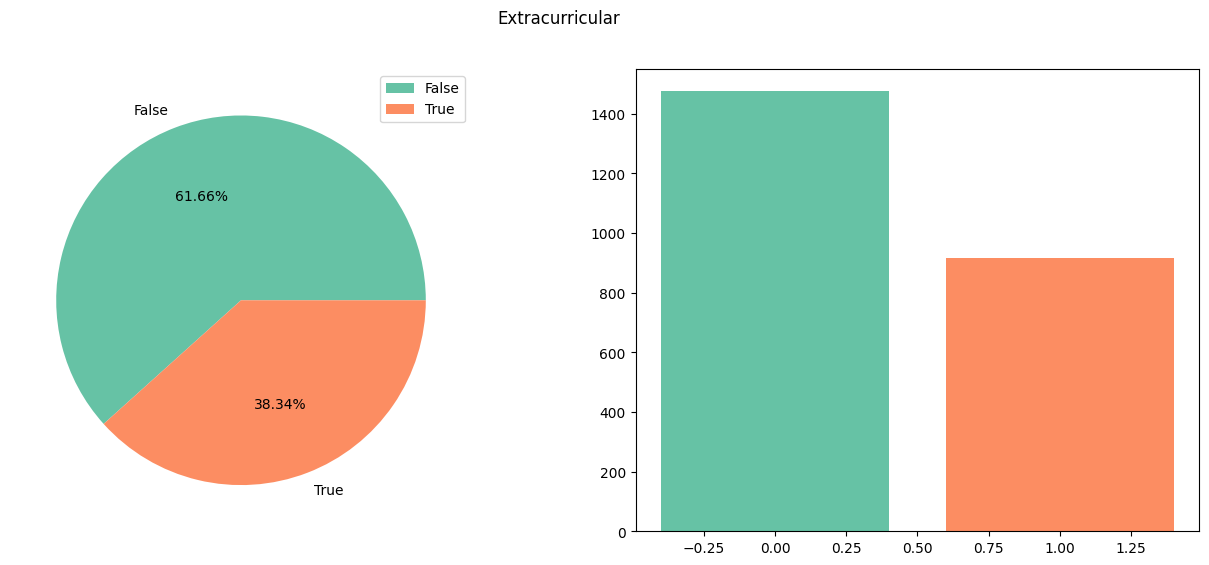

In [161]:
plot_pie_and_bar_chart("Extracurricular")

##### insights
- the most of the student have not extracurricular activities

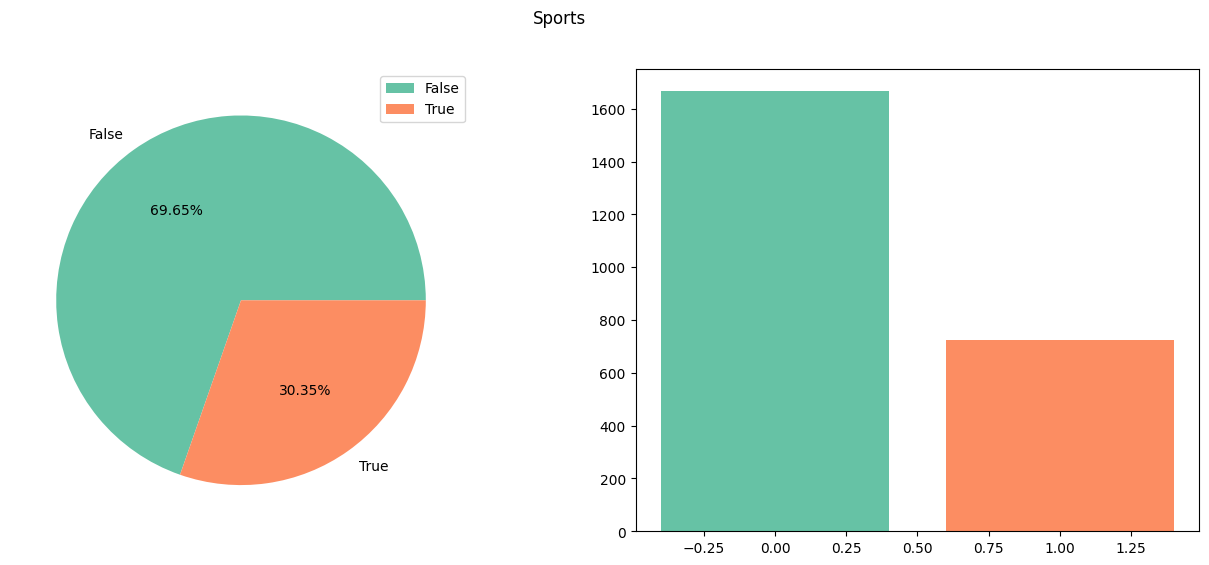

In [162]:
plot_pie_and_bar_chart("Sports")

##### insights
- the most ofm the student do not do sport

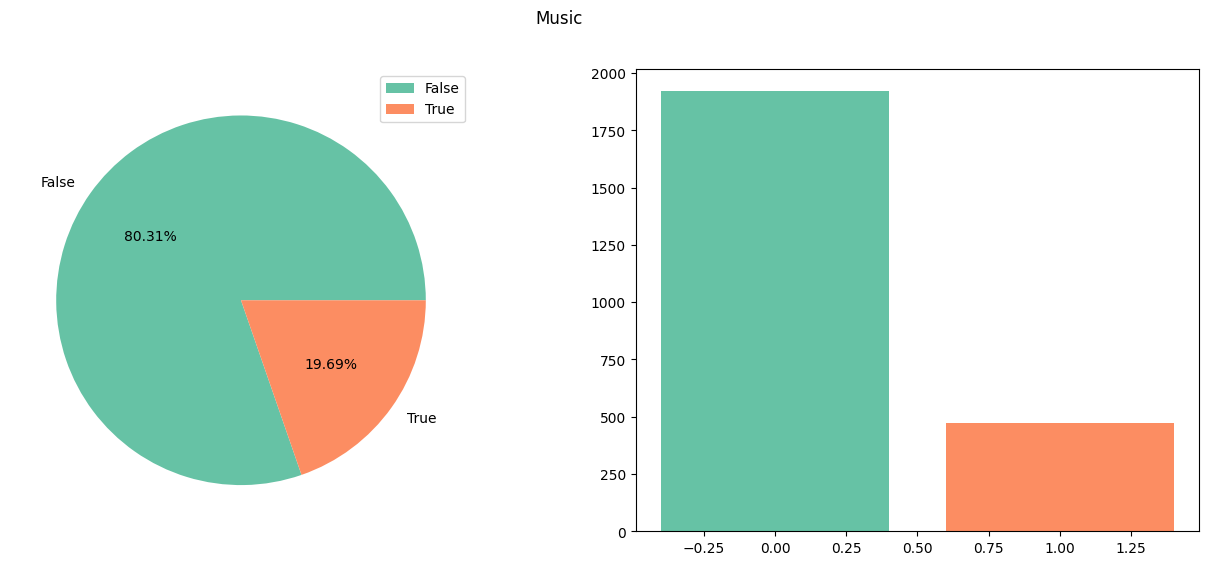

In [163]:
plot_pie_and_bar_chart("Music")

##### insights
- the most of the student do not play music

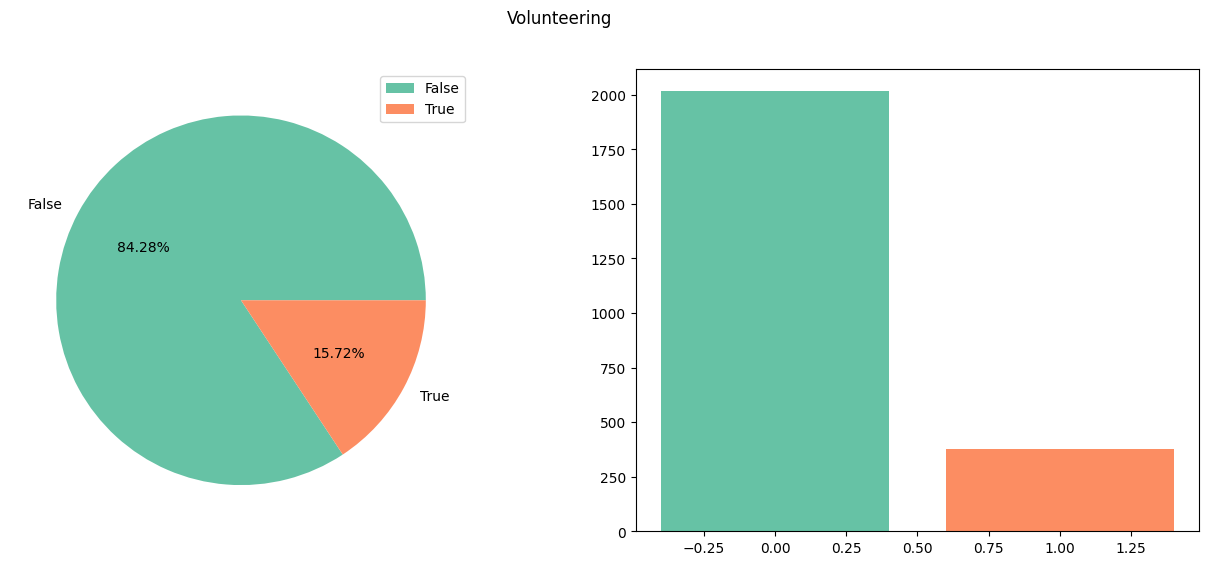

In [164]:
plot_pie_and_bar_chart("Volunteering")

##### insights
- the most of the student do not do Volunteering

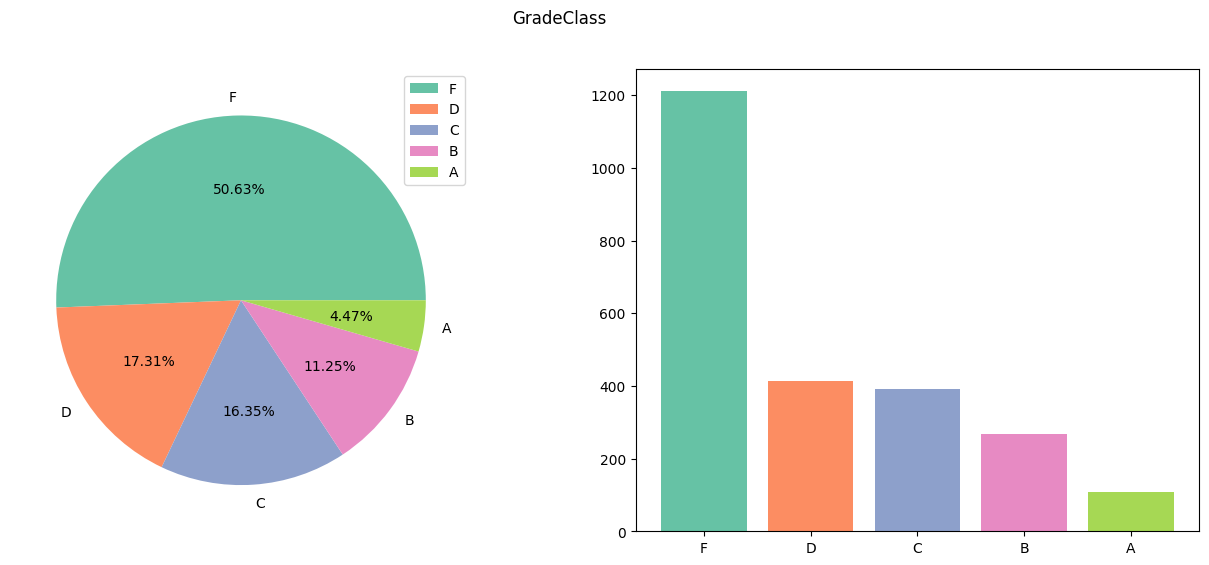

In [165]:
plot_pie_and_bar_chart("GradeClass")

##### insights
- half of the student fail

### 4.2 hist plot

In [183]:
def make_hist_plot(df, column, hue):
    fig , axes =plt.subplots(1,2, figsize = (13, 8))
    plt.subplot(121)
    sns.histplot(data = df , x = column , kde = True)
    plt.subplot(122)
    sns.histplot(data = df , x = column , kde = True , hue = hue)
    fig.suptitle("StudyTimeWeekly")
    plt.show()

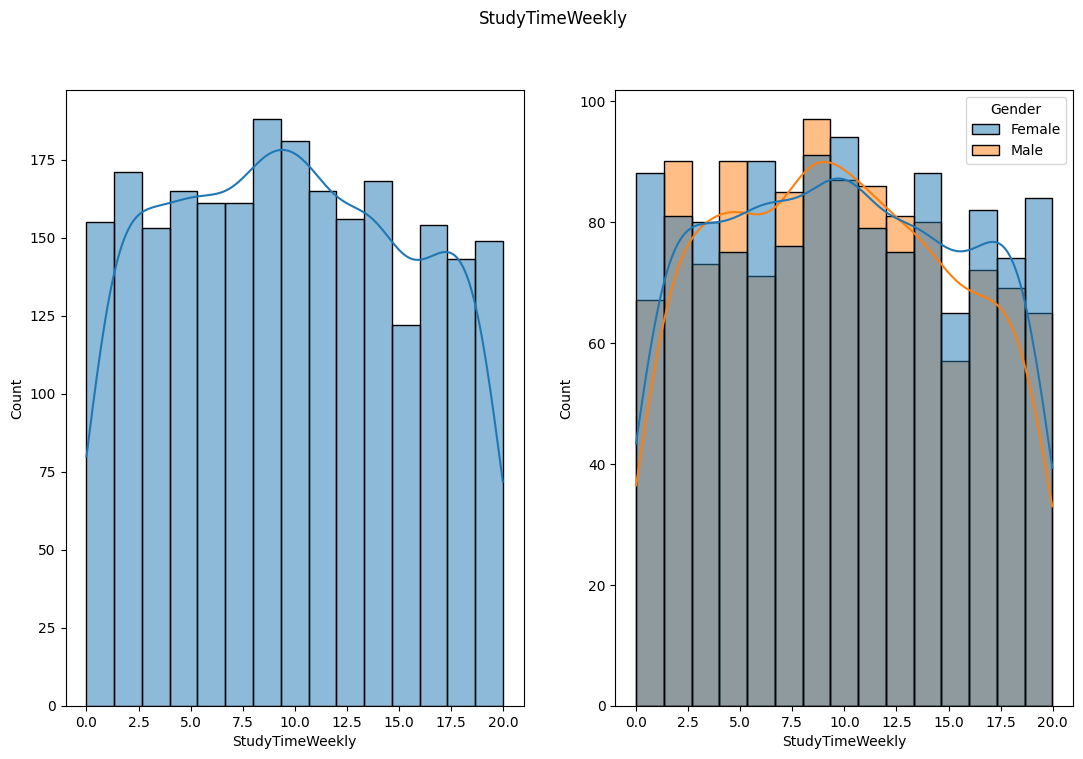

In [184]:
make_hist_plot(df ,"StudyTimeWeekly" , "Gender" )

#### insights
- the women study more

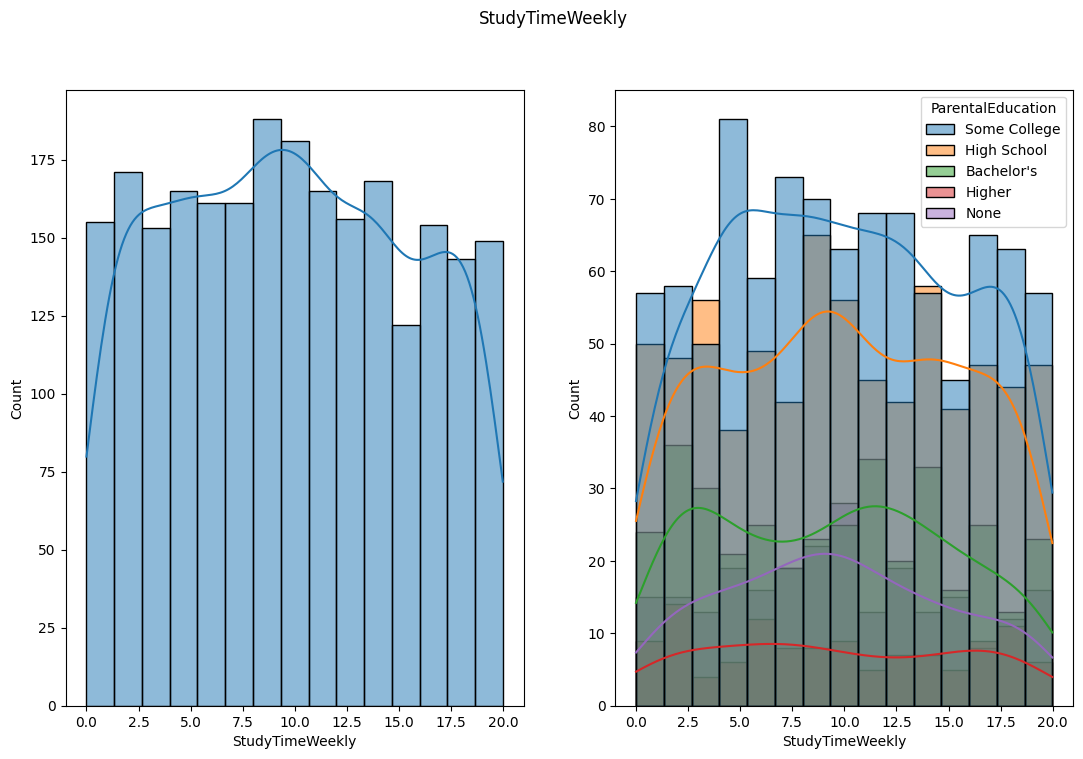

In [185]:
make_hist_plot(df ,"StudyTimeWeekly" , "ParentalEducation" )

##### insights
- the students with parents from some college study more

no hare graficas con las otras classes por que al haber una diferencia de cantidad de registros puede dar la impresion de conseguir una conclusion no valida debido a la diferencia de classes,por ejemplo en Ethnicity, la clase mayoritaria tendra mayor frecuenci

#### 4.3 box plot

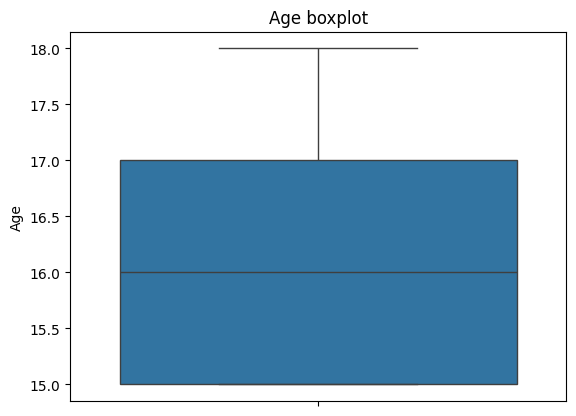

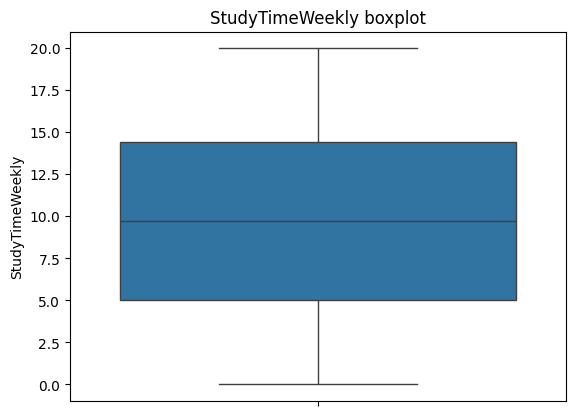

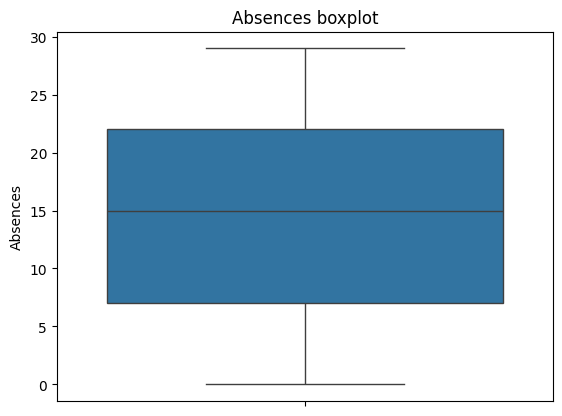

In [192]:
for column in numerical_columns:
    sns.boxplot(data = df , y = column  )
    plt.title(f"{column} boxplot")
    plt.show()

##### insights
- the numerical columns have not outlier

<h1>EDA END</h1>